In [24]:
#versão da Linguagem Python
from platform import python_version
print('Versão da linguagem Python usada no ambiente virtual desse projeto:', python_version())

Versão da linguagem Python usada no ambiente virtual desse projeto: 3.12.7


In [25]:
import pandas as pd
import numpy as np
import os
import re 
import openpyxl
import csv
import os
from IPython.display import display, HTML


In [26]:
import pandas as pd
import os
import re

# Defina o caminho para a sua pasta
caminho_da_pasta = r'C:\Users\mlzengo\Documents\TJGO\II SEMESTRE\forecast_case\data\raw\sinesp_data'

# Lista para armazenar cada DataFrame individual
lista_de_dataframes = []

# Lista todos os arquivos na pasta
arquivos_na_pasta = os.listdir(caminho_da_pasta)

# Itera sobre cada arquivo
for arquivo in arquivos_na_pasta:
    if arquivo.endswith('.csv'):
        caminho_csv = os.path.join(caminho_da_pasta, arquivo)
        
        print(f'Lendo o arquivo: {arquivo}')
        
        try:
            # Lê o arquivo CSV com as correções
            df_temp = pd.read_csv(
                caminho_csv, 
                encoding='latin1', 
                dtype=str           
            )
            
            # Extrai o ano para a nova coluna
            match = re.search(r'(\d{4})', arquivo)
            if match:
                ano = match.group(1) # Mantém o ano como string, consistente com dtype=str
                df_temp['Ano'] = ano
            else:
                df_temp['Fonte'] = arquivo
                
            lista_de_dataframes.append(df_temp)

        except Exception as e:
            print(f"ERRO ao ler o arquivo {arquivo}: {e}")

# Concatena todos os DataFrames da lista
if lista_de_dataframes:
    print("\nUnindo todos os arquivos em um único DataFrame...")
    df_final = pd.concat(lista_de_dataframes, ignore_index=True)
    print("Merge concluído com sucesso!")

    # Exibe informações sobre o DataFrame final
    print("\n--- Informações do DataFrame Final ---")
    print(f"Número total de linhas: {len(df_final)}")
    print(f"Número total de colunas: {len(df_final.columns)}")
    display(df_final.head())
else:
    print("\nNenhum arquivo CSV foi lido com sucesso.")

Lendo o arquivo: BancoVDE 2015.csv
Lendo o arquivo: BancoVDE 2016.csv
Lendo o arquivo: BancoVDE 2017.csv
Lendo o arquivo: BancoVDE 2018.csv
Lendo o arquivo: BancoVDE 2019.csv
Lendo o arquivo: BancoVDE 2020.csv
Lendo o arquivo: BancoVDE 2021.csv
Lendo o arquivo: BancoVDE 2022.csv
Lendo o arquivo: BancoVDE 2023.csv
Lendo o arquivo: BancoVDE 2024.csv
Lendo o arquivo: BancoVDE 2025.csv
Lendo o arquivo: df_go_seg_pub_2015-2025.csv

Unindo todos os arquivos em um único DataFrame...
Merge concluído com sucesso!

--- Informações do DataFrame Final ---
Número total de linhas: 7285755
Número total de colunas: 16


,uf,municipio,evento,data_referencia,agente,arma,faixa_etaria,feminino,masculino,nao_informado,total_vitima,total,total_peso,abrangencia,formulario,Ano
0,AC,NÃO INFORMADO,ApreensÃ£o de CocaÃ­na,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Estadual,FormulÃ¡rio 5,2015
1,AL,NÃO INFORMADO,ApreensÃ£o de CocaÃ­na,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.89,Estadual,FormulÃ¡rio 5,2015
2,AM,NÃO INFORMADO,ApreensÃ£o de CocaÃ­na,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.66,Estadual,FormulÃ¡rio 5,2015
3,AP,NÃO INFORMADO,ApreensÃ£o de CocaÃ­na,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.127,Estadual,FormulÃ¡rio 5,2015
4,BA,NÃO INFORMADO,ApreensÃ£o de CocaÃ­na,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.1,Estadual,FormulÃ¡rio 5,2015


In [27]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7285755 entries, 0 to 7285754
Data columns (total 16 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   uf               object
 1   municipio        object
 2   evento           object
 3   data_referencia  object
 4   agente           object
 5   arma             object
 6   faixa_etaria     object
 7   feminino         object
 8   masculino        object
 9   nao_informado    object
 10  total_vitima     object
 11  total            object
 12  total_peso       object
 13  abrangencia      object
 14  formulario       object
 15  Ano              object
dtypes: object(16)
memory usage: 889.4+ MB


In [28]:
import pandas as pd

# --- 1. Preparação dos Dados ---
# Converte a coluna de data para datetime
df_final['data_referencia'] = pd.to_datetime(df_final['data_referencia'], errors='coerce')

# Converte a coluna 'total' para um tipo numérico
df_final['total'] = pd.to_numeric(df_final['total'], errors='coerce')

# Preenche valores numéricos nulos com 0
df_final['total'] = df_final['total'].fillna(0)

# Remove linhas com datas inválidas, se houver
df_final.dropna(subset=['data_referencia'], inplace=True)


# --- 2. Criação da nova coluna com o total por mês ---
# Adiciona a coluna com o total de casos do mês correspondente a cada linha
df_final['total_por_mes'] = df_final.groupby(df_final['data_referencia'].dt.to_period('M'))['total'].transform('sum')

# Opcional: Mostrar o DataFrame com a nova coluna
print("--- DataFrame com a nova coluna 'total_por_mes' ---")
# Mostrando colunas relevantes para verificação
print(df_final[['data_referencia', 'total', 'total_por_mes']].head())


# --- 3. Contagem por Mês (para visualização do resumo) ---
casos_por_mes = df_final.groupby(df_final['data_referencia'].dt.to_period('M'))['total'].sum()
print("\n--- Resumo de Casos por Mês ---")
print(casos_por_mes)

--- DataFrame com a nova coluna 'total_por_mes' ---
  data_referencia  total  total_por_mes
0      2015-01-01    0.0       176733.0
1      2015-01-01    0.0       176733.0
2      2015-01-01    0.0       176733.0
3      2015-01-01    0.0       176733.0
4      2015-01-01    0.0       176733.0

--- Resumo de Casos por Mês ---
data_referencia
2015-01    176733.0
2015-02    163550.0
2015-03    190826.0
2015-04    183517.0
2015-05    189355.0
2015-06    184547.0
2015-07    190245.0
2015-08    212398.0
2015-09    221486.0
2015-10    227237.0
2015-11    216114.0
2015-12    207494.0
2016-01    326109.0
2016-02    350629.0
2016-03    392120.0
2016-04    389053.0
2016-05    391407.0
2016-06    401464.0
2016-07    399500.0
2016-08    416589.0
2016-09    384278.0
2016-10    363895.0
2016-11    357848.0
2016-12    351785.0
2017-01    376548.0
2017-02    382596.0
2017-03    457801.0
2017-04    399768.0
2017-05    441953.0
2017-06    417462.0
2017-07    431933.0
2017-08    457647.0
2017-09    413397.0

In [29]:
df_final

,uf,municipio,evento,data_referencia,agente,arma,faixa_etaria,feminino,masculino,nao_informado,total_vitima,total,total_peso,abrangencia,formulario,Ano,total_por_mes
0,AC,NÃO INFORMADO,ApreensÃ£o de CocaÃ­na,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Estadual,FormulÃ¡rio 5,2015,176733.0
1,AL,NÃO INFORMADO,ApreensÃ£o de CocaÃ­na,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,19.89,Estadual,FormulÃ¡rio 5,2015,176733.0
2,AM,NÃO INFORMADO,ApreensÃ£o de CocaÃ­na,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,40.66,Estadual,FormulÃ¡rio 5,2015,176733.0
3,AP,NÃO INFORMADO,ApreensÃ£o de CocaÃ­na,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.127,Estadual,FormulÃ¡rio 5,2015,176733.0
4,BA,NÃO INFORMADO,ApreensÃ£o de CocaÃ­na,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,16.1,Estadual,FormulÃ¡rio 5,2015,176733.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7086828,GO,NÃO INFORMADO,TrÃ¡fico de drogas,2018-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,557.0,NaN,Estadual,FormulÃÂÃÂ¡rio 4,2015,519494.0
7086829,GO,NÃO INFORMADO,TrÃ¡fico de drogas,2018-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.0,NaN,Estadual,FormulÃÂÃÂ¡rio 4,2015,461989.0
7086830,GO,NÃO INFORMADO,TrÃ¡fico de drogas,2018-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,553.0,NaN,Estadual,FormulÃÂÃÂ¡rio 4,2015,479032.0
7086831,GO,NÃO INFORMADO,TrÃ¡fico de drogas,2018-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,590.0,NaN,Estadual,FormulÃÂÃÂ¡rio 4,2015,437476.0


In [30]:
df_go = df_final[df_final['uf'] == 'GO']

In [31]:
df_go.columns

Index(['uf', 'municipio', 'evento', 'data_referencia', 'agente', 'arma',
       'faixa_etaria', 'feminino', 'masculino', 'nao_informado',
       'total_vitima', 'total', 'total_peso', 'abrangencia', 'formulario',
       'Ano', 'total_por_mes'],
      dtype='object')

In [32]:
# 1. Criar um dicionário para mapear o número do mês para o nome em português
mapa_meses = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}

# 2. Extrair o número do mês da coluna 'data_referencia' e aplicar o mapa
df_go['nome_mes'] = df_go['data_referencia'].dt.month.map(mapa_meses)

# 3. Verificar o resultado, mostrando a data original e o nome do mês
print(df_go[['data_referencia', 'nome_mes']].head())

    data_referencia   nome_mes
7        2015-01-01    Janeiro
33       2015-02-01  Fevereiro
59       2015-03-01      Março
85       2015-04-01      Abril
111      2015-05-01       Maio


C:\Users\mlzengo\AppData\Local\Temp\ipykernel_21132\330582005.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_go['nome_mes'] = df_go['data_referencia'].dt.month.map(mapa_meses)


In [33]:
df_go.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282966 entries, 7 to 7086832
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   uf               282966 non-null  object        
 1   municipio        282966 non-null  object        
 2   evento           282966 non-null  object        
 3   data_referencia  282966 non-null  datetime64[ns]
 4   agente           1944 non-null    object        
 5   arma             1296 non-null    object        
 6   faixa_etaria     648 non-null     object        
 7   feminino         209268 non-null  object        
 8   masculino        209268 non-null  object        
 9   nao_informado    209268 non-null  object        
 10  total_vitima     209268 non-null  object        
 11  total            282966 non-null  float64       
 12  total_peso       198 non-null     object        
 13  abrangencia      282966 non-null  object        
 14  formulario       282966 


🎯 ============================================================
📊 ANÁLISE COMPLETA DO DATASET - VIOLÊNCIA NO ESTADO
🎯 ============================================================
📋 INFORMACÕES GERAIS:
----------------------------------------
   • Total de registros: 282,966
   • Total de colunas: 18
   • Período abrangido: 01/01/2015 a 01/12/2018
   • Memória utilizada: 217.3 MB

🔍 COMPLETUDE DOS DADOS (NÃO-NULOS):
---------------------------------------------


,Coluna,Não-Nulos,Percentual (%),Tipo
0,uf,"282,966",100.0%,object
1,municipio,"282,966",100.0%,object
2,evento,"282,966",100.0%,object
3,data_referencia,"282,966",100.0%,datetime64[ns]
4,agente,"1,944",0.7%,object
5,arma,"1,296",0.5%,object
6,faixa_etaria,648,0.2%,object
7,feminino,"209,268",74.0%,object
8,masculino,"209,268",74.0%,object
9,nao_informado,"209,268",74.0%,object



⚠️  COLUNAS COM BAIXA COMPLETUDE (<50%):
----------------------------------------
   • agente: 0.69% de preenchimento
   • arma: 0.46% de preenchimento
   • faixa_etaria: 0.23% de preenchimento
   • total_peso: 0.07% de preenchimento

📅 ANÁLISE TEMPORAL:
-------------------------
   • Anos com dados: 4
   • Ano com mais casos: 2015 (2,785,697 casos)


C:\Users\mlzengo\AppData\Local\Temp\ipykernel_21132\3789010030.py:63: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\mlzengo\Documents\TJGO\II SEMESTRE\forecast_case\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


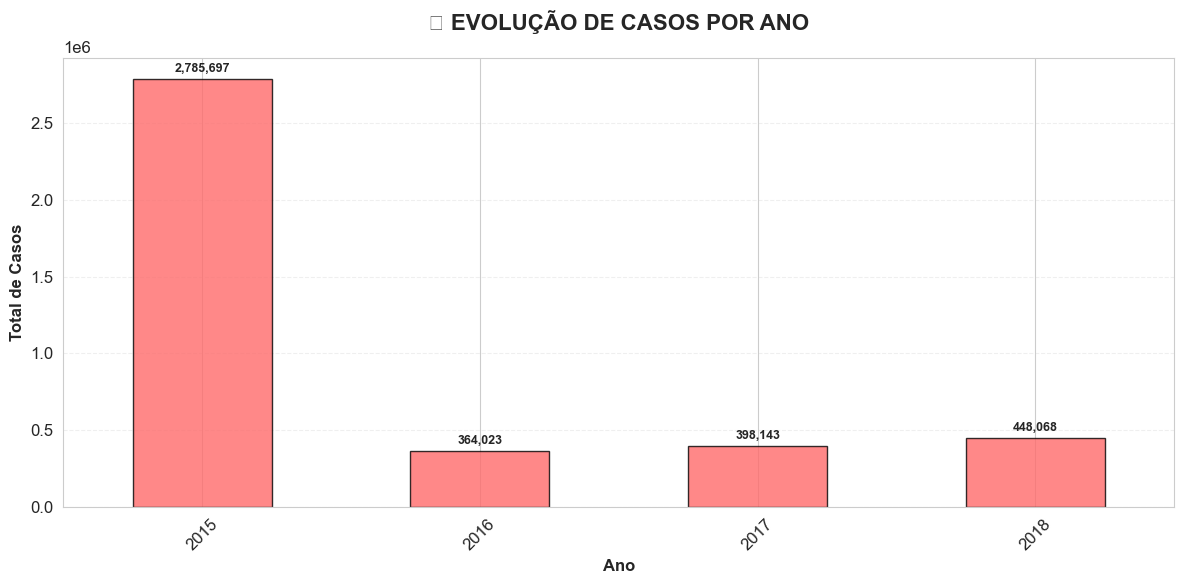

C:\Users\mlzengo\AppData\Local\Temp\ipykernel_21132\3789010030.py:84: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\mlzengo\Documents\TJGO\II SEMESTRE\forecast_case\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


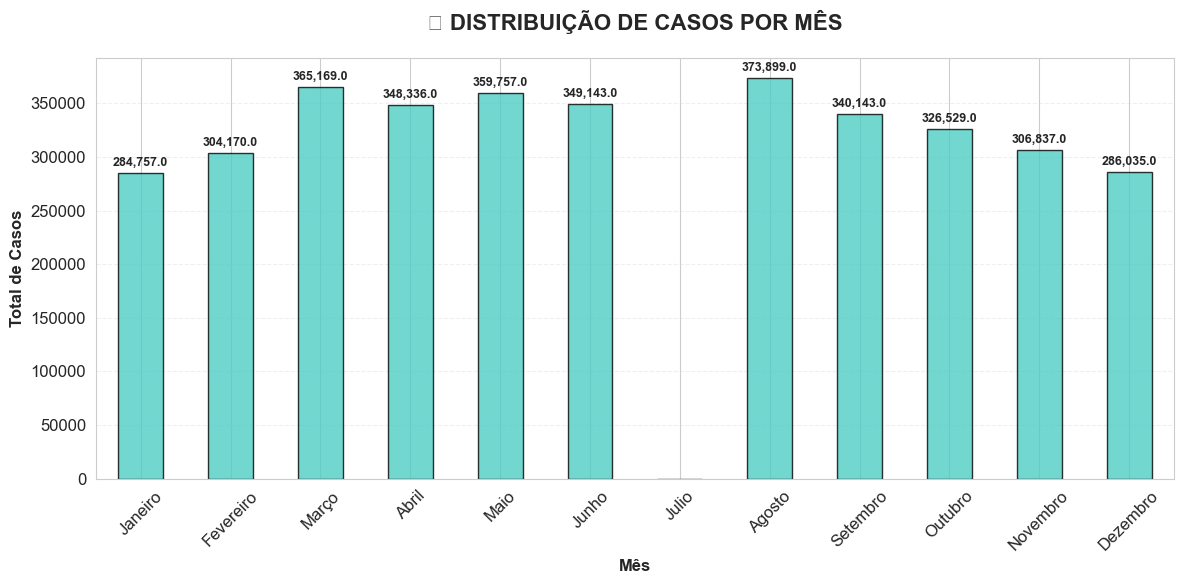

C:\Users\mlzengo\AppData\Local\Temp\ipykernel_21132\3789010030.py:111: UserWarning: Glyph 131 (\x83) missing from font(s) Arial.
  plt.tight_layout()



🌎 ANÁLISE GEOGRÁFICA:
-------------------------
   • Municípios únicos: 247
   • Tipos de evento: 30


C:\Users\mlzengo\AppData\Local\Temp\ipykernel_21132\3789010030.py:111: UserWarning: Glyph 130 (\x82) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\mlzengo\AppData\Local\Temp\ipykernel_21132\3789010030.py:111: UserWarning: Glyph 129 (\x81) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\mlzengo\AppData\Local\Temp\ipykernel_21132\3789010030.py:111: UserWarning: Glyph 141 (\x8d) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\mlzengo\AppData\Local\Temp\ipykernel_21132\3789010030.py:111: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\mlzengo\AppData\Local\Temp\ipykernel_21132\3789010030.py:111: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\mlzengo\Documents\TJGO\II SEMESTRE\forecast_case\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 131 (\x83) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c

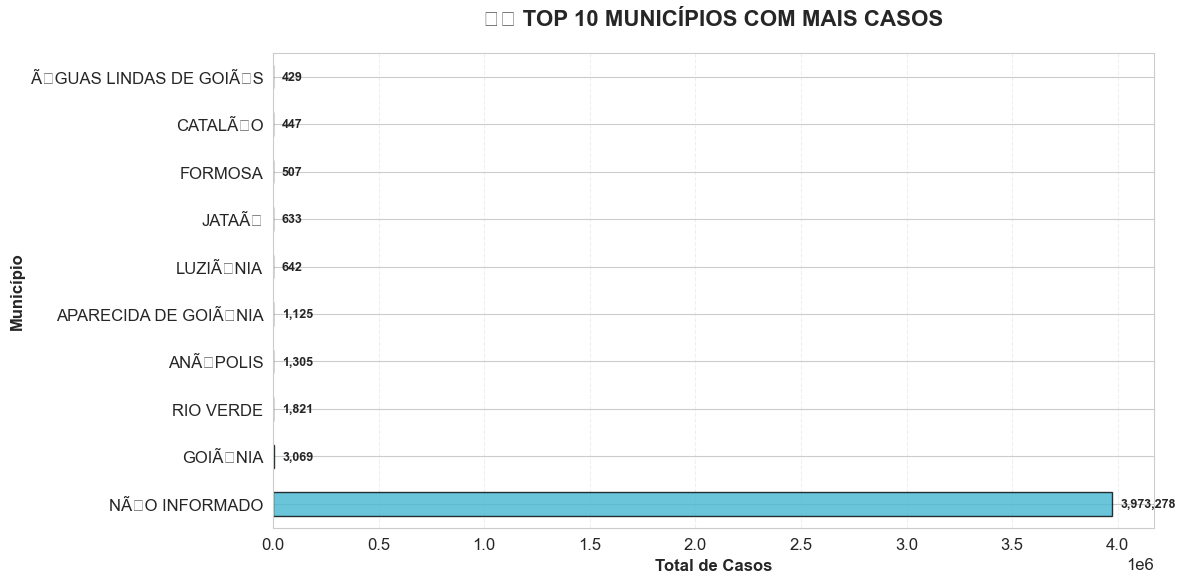


⚡ ANÁLISE DE EVENTOS:
-------------------------


C:\Users\mlzengo\AppData\Local\Temp\ipykernel_21132\3789010030.py:131: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\mlzengo\Documents\TJGO\II SEMESTRE\forecast_case\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


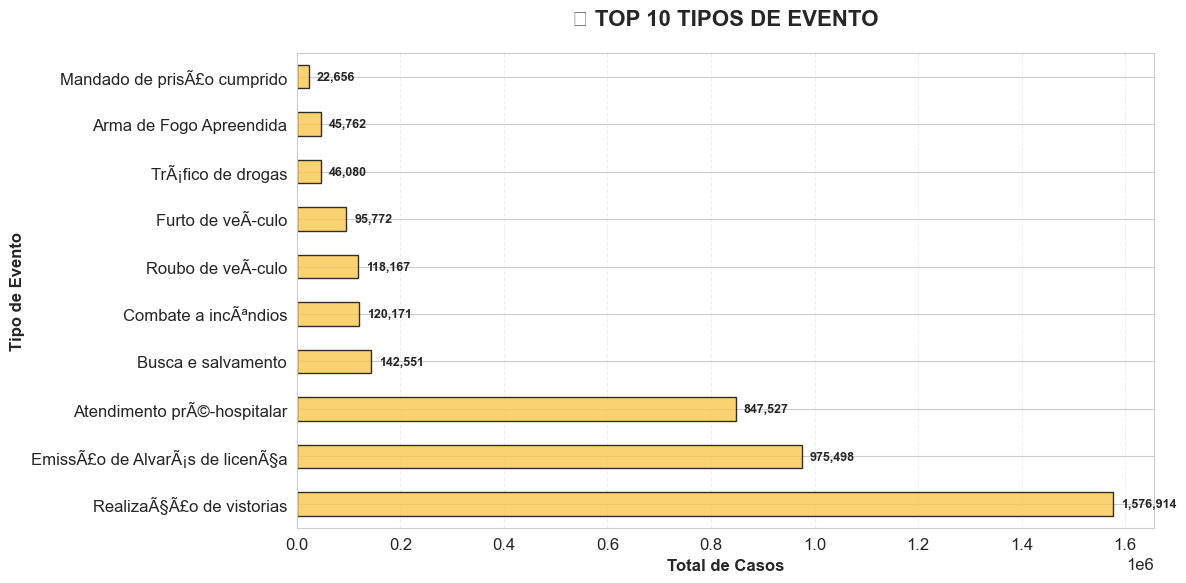

C:\Users\mlzengo\AppData\Local\Temp\ipykernel_21132\3789010030.py:169: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) Arial.
  plt.tight_layout()



👥 ANÁLISE DEMOGRÁFICA (GÊNERO):
-----------------------------------


c:\Users\mlzengo\Documents\TJGO\II SEMESTRE\forecast_case\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


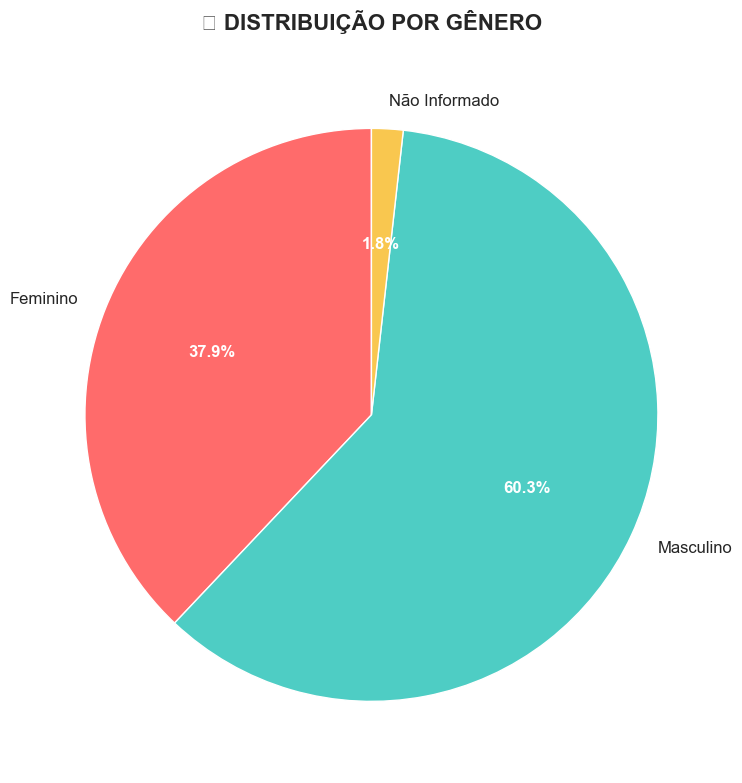

,Gênero,Total,Percentual
0,Feminino,"47,166",37.9%
1,Masculino,"74,928",60.3%
2,Não Informado,"2,208",1.8%



💡 RESUMO ESTATÍSTICO:
-------------------------
   📈 Total geral de casos: 3,995,931
   📊 Média mensal de casos: 411931.7
   🔝 Município com mais casos: NÃO INFORMADO (3,973,278)
   ⚡ Evento mais comum: RealizaÃ§Ã£o de vistorias (1,576,914)
   📅 Período total: 1430 dias

📈 ANÁLISE DE CORRELAÇÕES:
------------------------------


C:\Users\mlzengo\AppData\Local\Temp\ipykernel_21132\3789010030.py:198: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\mlzengo\Documents\TJGO\II SEMESTRE\forecast_case\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


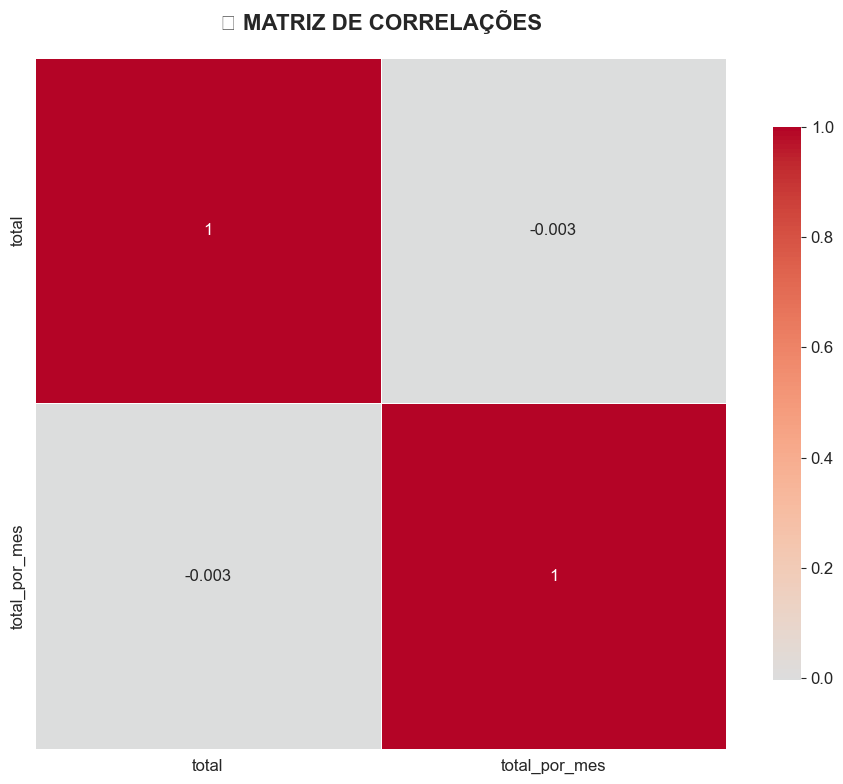


✅ ANÁLISE CONCLUÍDA COM SUCESSO!


In [34]:
print("\n🎯 " + "="*60)
print("📊 ANÁLISE COMPLETA DO DATASET - VIOLÊNCIA NO ESTADO")
print("🎯 " + "="*60)

# Informações básicas do dataset
print(f"📋 INFORMACÕES GERAIS:")
print("-" * 40)
print(f"   • Total de registros: {len(df_go):,}")
print(f"   • Total de colunas: {len(df_go.columns)}")
print(f"   • Período abrangido: {df_go['data_referencia'].min().strftime('%d/%m/%Y')} a {df_go['data_referencia'].max().strftime('%d/%m/%Y')}")
print(f"   • Memória utilizada: {df_go.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# Análise de completude das colunas
print(f"\n🔍 COMPLETUDE DOS DADOS (NÃO-NULOS):")
print("-" * 45)

completude = pd.DataFrame({
    'Coluna': df_go.columns,
    'Não-Nulos': df_go.notnull().sum().values,
    'Percentual (%)': (df_go.notnull().sum().values / len(df_go) * 100).round(2),
    'Tipo': df_go.dtypes.values
})

display(HTML("<h4 style='color: #2E86AB;'>📊 COMPLETUDE DAS COLUNAS</h4>"))
display(completude.style.format({
    'Não-Nulos': '{:,}',
    'Percentual (%)': '{:.1f}%'
}).bar(subset=['Percentual (%)'], color='#5fba7d')
.highlight_min(subset=['Percentual (%)'], color='#ffcccb')
.set_properties(**{'background-color': '#f8f9fa', 'color': '#2c3e50'}))

# Análise das colunas com muitos valores nulos
colunas_problematicas = completude[completude['Percentual (%)'] < 50]['Coluna'].tolist()
if colunas_problematicas:
    print(f"\n⚠️  COLUNAS COM BAIXA COMPLETUDE (<50%):")
    print("-" * 40)
    for coluna in colunas_problematicas:
        perc = completude[completude['Coluna'] == coluna]['Percentual (%)'].values[0]
        print(f"   • {coluna}: {perc}% de preenchimento")

# Análise temporal
print(f"\n📅 ANÁLISE TEMPORAL:")
print("-" * 25)

# Distribuição por ano
casos_por_ano = df_go.groupby('Ano')['total'].sum().astype(int)
print(f"   • Anos com dados: {len(casos_por_ano)}")
print(f"   • Ano com mais casos: {casos_por_ano.idxmax()} ({casos_por_ano.max():,} casos)")

# Gráfico de evolução anual
plt.figure(figsize=(12, 6))
casos_por_ano.plot(kind='bar', color='#ff6b6b', edgecolor='black', alpha=0.8)
plt.title('📈 EVOLUÇÃO DE CASOS POR ANO', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Total de Casos', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')

for i, valor in enumerate(casos_por_ano.values):
    plt.text(i, valor + max(casos_por_ano.values)*0.01, f'{valor:,}', 
            ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análise por mês
casos_por_mes = df_go.groupby('nome_mes')['total'].sum().astype(int)
meses_ordem = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
               'Julio', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
casos_por_mes = casos_por_mes.reindex(meses_ordem)

plt.figure(figsize=(12, 6))
casos_por_mes.plot(kind='bar', color='#4ecdc4', edgecolor='black', alpha=0.8)
plt.title('📊 DISTRIBUIÇÃO DE CASOS POR MÊS', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Mês', fontsize=12, fontweight='bold')
plt.ylabel('Total de Casos', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')

for i, valor in enumerate(casos_por_mes.values):
    plt.text(i, valor + max(casos_por_mes.values)*0.01, f'{valor:,}', 
            ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análise geográfica
print(f"\n🌎 ANÁLISE GEOGRÁFICA:")
print("-" * 25)

municipios_unicos = df_go['municipio'].nunique()
eventos_unicos = df_go['evento'].nunique()

print(f"   • Municípios únicos: {municipios_unicos}")
print(f"   • Tipos de evento: {eventos_unicos}")

# Top 10 municípios com mais casos
top_municipios = df_go.groupby('municipio')['total'].sum().nlargest(10).astype(int)

plt.figure(figsize=(12, 6))
top_municipios.plot(kind='barh', color='#45b7d1', edgecolor='black', alpha=0.8)
plt.title('🏙️ TOP 10 MUNICÍPIOS COM MAIS CASOS', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Total de Casos', fontsize=12, fontweight='bold')
plt.ylabel('Município', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3, linestyle='--')

for i, valor in enumerate(top_municipios.values):
    plt.text(valor + max(top_municipios.values)*0.01, i, f'{valor:,}', 
            ha='left', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# Análise de eventos
print(f"\n⚡ ANÁLISE DE EVENTOS:")
print("-" * 25)

top_eventos = df_go.groupby('evento')['total'].sum().nlargest(10).astype(int)

plt.figure(figsize=(12, 6))
top_eventos.plot(kind='barh', color='#f9c74f', edgecolor='black', alpha=0.8)
plt.title('⚡ TOP 10 TIPOS DE EVENTO', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Total de Casos', fontsize=12, fontweight='bold')
plt.ylabel('Tipo de Evento', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3, linestyle='--')

for i, valor in enumerate(top_eventos.values):
    plt.text(valor + max(top_eventos.values)*0.01, i, f'{valor:,}', 
            ha='left', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# Análise demográfica (gênero)
print(f"\n👥 ANÁLISE DEMOGRÁFICA (GÊNERO):")
print("-" * 35)

if 'feminino' in df_go.columns and 'masculino' in df_go.columns:
    total_feminino = df_go['feminino'].astype(float).sum()
    total_masculino = df_go['masculino'].astype(float).sum()
    total_nao_informado = df_go['nao_informado'].astype(float).sum()
    
    genero_data = {
        'Gênero': ['Feminino', 'Masculino', 'Não Informado'],
        'Total': [total_feminino, total_masculino, total_nao_informado],
        'Percentual': [
            total_feminino/(total_feminino+total_masculino+total_nao_informado)*100,
            total_masculino/(total_feminino+total_masculino+total_nao_informado)*100,
            total_nao_informado/(total_feminino+total_masculino+total_nao_informado)*100
        ]
    }
    
    genero_df = pd.DataFrame(genero_data)
    
    # Gráfico de pizza
    plt.figure(figsize=(10, 8))
    colors = ['#ff6b6b', '#4ecdc4', '#f9c74f']
    wedges, texts, autotexts = plt.pie(genero_df['Total'], labels=genero_df['Gênero'], 
                                      autopct='%1.1f%%', colors=colors, startangle=90)
    
    plt.title('👥 DISTRIBUIÇÃO POR GÊNERO', fontsize=16, fontweight='bold', pad=20)
    
    # Melhorar a legibilidade
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(12)
    
    plt.tight_layout()
    plt.show()
    
    display(HTML("<h4 style='color: #2E86AB;'>📊 ESTATÍSTICAS POR GÊNERO</h4>"))
    display(genero_df.style.format({
        'Total': '{:,.0f}',
        'Percentual': '{:.1f}%'
    }))

# Estatísticas resumidas
print(f"\n💡 RESUMO ESTATÍSTICO:")
print("-" * 25)
print(f"   📈 Total geral de casos: {df_go['total'].sum():,.0f}")
print(f"   📊 Média mensal de casos: {df_go['total_por_mes'].mean():.1f}")
print(f"   🔝 Município com mais casos: {top_municipios.index[0]} ({top_municipios.values[0]:,})")
print(f"   ⚡ Evento mais comum: {top_eventos.index[0]} ({top_eventos.values[0]:,})")
print(f"   📅 Período total: {(df_go['data_referencia'].max() - df_go['data_referencia'].min()).days} dias")

# Correlações entre variáveis numéricas
print(f"\n📈 ANÁLISE DE CORRELAÇÕES:")
print("-" * 30)

if len(df_go.select_dtypes(include=[np.number]).columns) > 1:
    corr_matrix = df_go.select_dtypes(include=[np.number]).corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title('🔥 MATRIZ DE CORRELAÇÕES', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

print("\n" + "="*60)
print("✅ ANÁLISE CONCLUÍDA COM SUCESSO!")
print("="*60)